In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pandas.io.json import json_normalize

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#print(api_keys.api_key)
api_key = "XXXXXXXXXXXXXXXXXXXXXXXXXX"
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
########################################################################################

########################################################################################
def get_requests_in_json(from_url):
    req = requests.get(from_url)
    #TODO need to validate on the timeout...
    if 200 == req.status_code:
        res = requests.get(from_url).json()
    else: 
        res = ''
        #print("Error !!! ", from_url)
    return res
########################################################################################
#Loop thru the cities and check if the data exists before appending
citiesData = []
for city in cities:
    from_url = base_url + "&q=" + city
    response = get_requests_in_json(base_url + "&q=" + city)
    if response  != '':
        citiesData.append(response)
len(citiesData)

552

In [4]:
citiesDataDF = pd.DataFrame(json_normalize(citiesData))

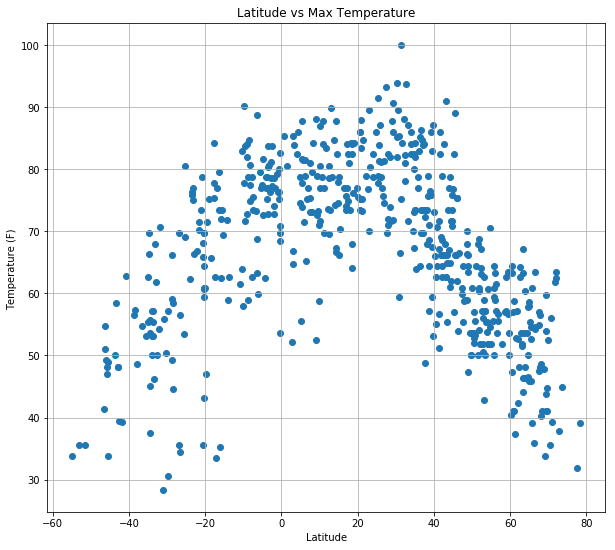

In [16]:
plt.rcParams["figure.figsize"] = [10, 9]
# Build a scatter plot for each data type
def CityScatterPlot(xAxis, yAxis, title, xLabel, yLabel):
    plt.scatter(xAxis, yAxis, marker="o")
    plt.title(title)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.grid(True)
    return plt
# Latitude vs Max Temp
latitudeVsTemperture = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['main.temp_max'],
                                      "Latitude vs Max Temperature",
                                      "Latitude",
                                      "Temperature (F) ")
latitudeVsTemperture.show()

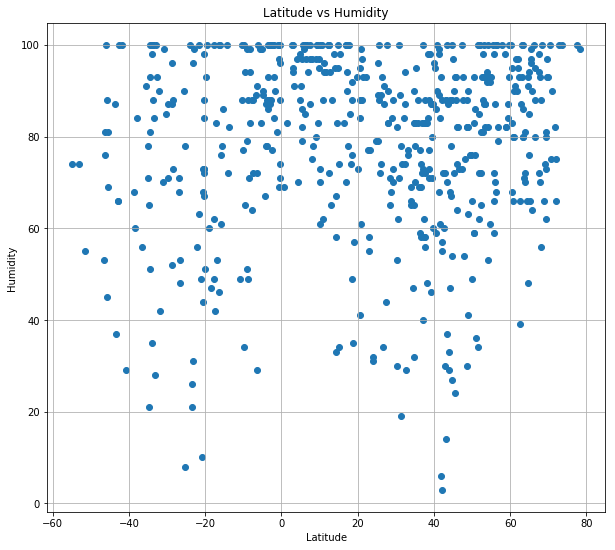

In [17]:
latitudeVsHumidity = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['main.humidity'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Humidity")
latitudeVsHumidity.show()

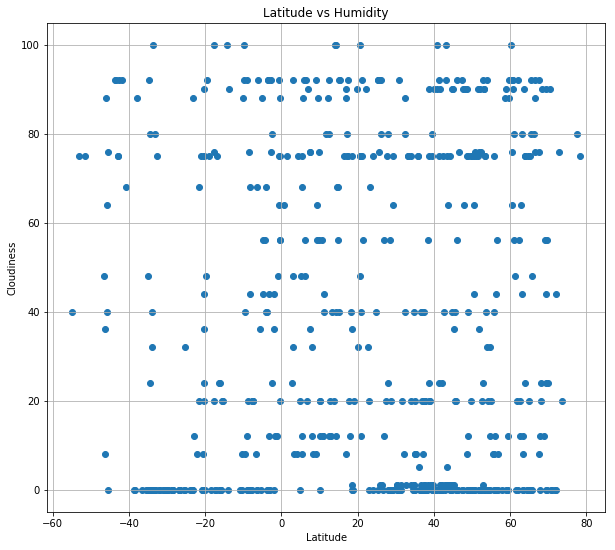

In [18]:
latitudeVsCloudiness = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['clouds.all'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Cloudiness")
latitudeVsCloudiness.show()

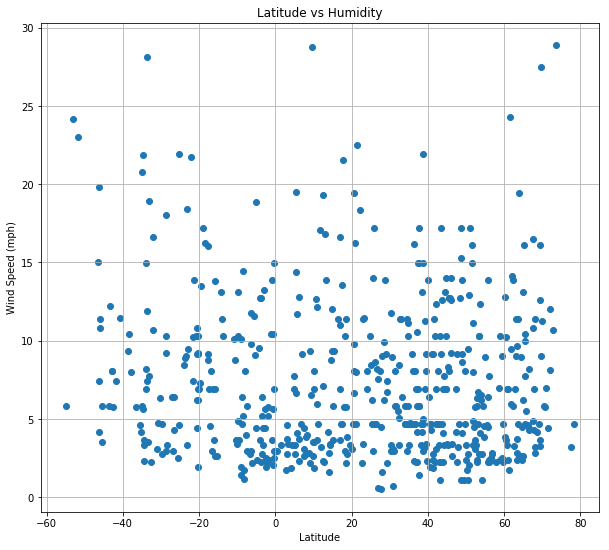

In [19]:
latitudeVsWindSpeed = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['wind.speed'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Wind Speed (mph)")
latitudeVsWindSpeed.show()

In [20]:
plt.figure(1)
plt.subplot(221)
latitudeVsTemperture = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['main.temp_max'],
                                      "Latitude vs Max Temperature",
                                      "Latitude",
                                      "Temperature (F) ")
plt.subplot(222)
latitudeVsHumidity = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['main.humidity'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Humidity")
plt.subplot(223)
latitudeVsCloudiness = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['clouds.all'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Cloudiness")
plt.subplot(224)
latitudeVsWindSpeed = CityScatterPlot(citiesDataDF['coord.lat'], 
                                       citiesDataDF['wind.speed'],
                                      "Latitude vs Humidity",
                                      "Latitude",
                                      "Wind Speed (mph)")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.savefig('WeatherReport.png')

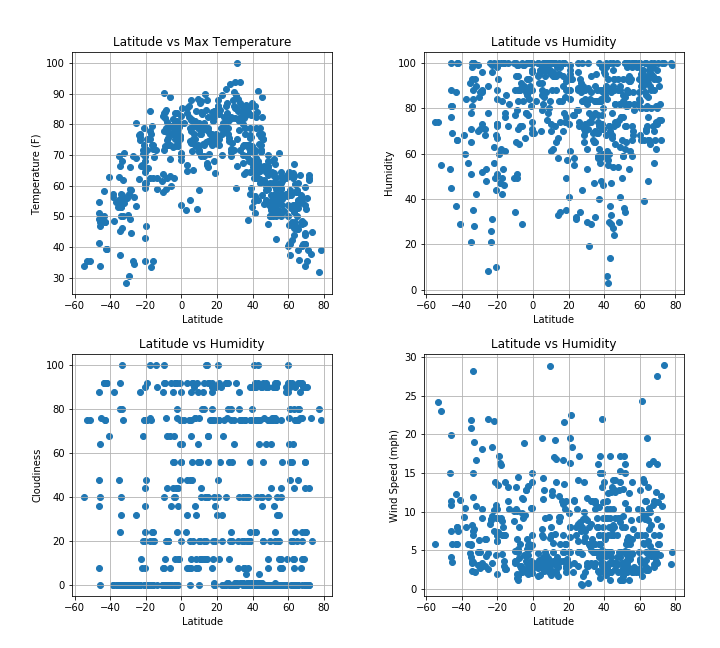

In [21]:
from IPython.display import display, Image, SVG, Math
Image('./WeatherReport.png', embed=True)